In [1]:
import fastf1 as ff1
import fastf1.plotting
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
from utils import DriverRacePaceInfo
from statistics import mode
import numpy as np

In [2]:
ff1.Cache.enable_cache('./cache')
sess = ff1.get_session(2022, "Australia", "FP2")
sess.load()

core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v2.2.0]
api            INFO 	Using cached data for driver_info
core          ERROR 	Failed to load data from Ergast API!
Traceback (most recent call last):
  File "/home/mchegini/.conda/envs/f1_env/lib/python3.9/site-packages/fastf1/core.py", line 1407, in _drivers_results_from_ergast
    data = ergast.fetch_results(
  File "/home/mchegini/.conda/envs/f1_env/lib/python3.9/site-packages/fastf1/ergast.py", line 25, in fetch_results
    return _parse_ergast(fetch_day(year, gp, day))[0][sel]
IndexError: list index out of range
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 5
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api           

In [3]:
df = pd.DataFrame(sess.laps)
df.dropna(subset=['LapTime'], inplace=True)

In [4]:
df[df["Driver"] == "GAS"]

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
320,0 days 00:18:10.095000,10,0 days 00:01:47.657000,1.0,1.0,0 days 00:16:25.599000,NaT,0 days 00:00:41.343000,0 days 00:00:20.624000,0 days 00:00:45.690000,...,312.0,HARD,1.0,True,0 days 00:16:25.599000,AlphaTauri,GAS,1,False,2022-04-08 06:01:25.609
321,0 days 00:19:34.304000,10,0 days 00:01:24.209000,2.0,1.0,NaT,NaT,0 days 00:00:29.272000,0 days 00:00:18.850000,0 days 00:00:36.087000,...,262.0,HARD,2.0,True,0 days 00:18:10.095000,AlphaTauri,GAS,1,True,2022-04-08 06:03:10.105
322,0 days 00:21:19.977000,10,0 days 00:01:45.673000,3.0,1.0,NaT,NaT,0 days 00:00:36.754000,0 days 00:00:22.443000,0 days 00:00:46.476000,...,315.0,HARD,3.0,True,0 days 00:19:34.304000,AlphaTauri,GAS,1,True,2022-04-08 06:04:34.314
323,0 days 00:22:42.046000,10,0 days 00:01:22.069000,4.0,1.0,NaT,NaT,0 days 00:00:28.462000,0 days 00:00:18.511000,0 days 00:00:35.096000,...,295.0,HARD,4.0,True,0 days 00:21:19.977000,AlphaTauri,GAS,1,True,2022-04-08 06:06:19.987
324,0 days 00:24:44.117000,10,0 days 00:02:02.071000,5.0,1.0,NaT,NaT,0 days 00:00:46.177000,0 days 00:00:27.202000,0 days 00:00:48.692000,...,313.0,HARD,5.0,True,0 days 00:22:42.046000,AlphaTauri,GAS,1,True,2022-04-08 06:07:42.056
325,0 days 00:26:27.153000,10,0 days 00:01:43.036000,6.0,1.0,NaT,NaT,0 days 00:00:32.957000,0 days 00:00:22.283000,0 days 00:00:47.796000,...,314.0,HARD,6.0,True,0 days 00:24:44.117000,AlphaTauri,GAS,1,True,2022-04-08 06:09:44.127
326,0 days 00:27:48.782000,10,0 days 00:01:21.629000,7.0,1.0,NaT,NaT,0 days 00:00:28.265000,0 days 00:00:18.368000,0 days 00:00:34.996000,...,290.0,HARD,7.0,True,0 days 00:26:27.153000,AlphaTauri,GAS,1,True,2022-04-08 06:11:27.163
328,0 days 00:39:29.324000,10,0 days 00:02:00.442000,9.0,2.0,0 days 00:37:30.885000,NaT,0 days 00:00:44.416000,0 days 00:00:21.282000,0 days 00:00:54.744000,...,315.0,SOFT,2.0,True,0 days 00:37:28.882000,AlphaTauri,GAS,1,False,2022-04-08 06:22:28.892
329,0 days 00:40:49.831000,10,0 days 00:01:20.507000,10.0,2.0,NaT,NaT,0 days 00:00:27.850000,0 days 00:00:18.155000,0 days 00:00:34.502000,...,269.0,SOFT,3.0,True,0 days 00:39:29.324000,AlphaTauri,GAS,1,True,2022-04-08 06:24:29.334
330,0 days 00:42:58.049000,10,0 days 00:02:08.218000,11.0,2.0,NaT,NaT,0 days 00:00:45.117000,0 days 00:00:30.412000,0 days 00:00:52.689000,...,314.0,SOFT,4.0,True,0 days 00:40:49.831000,AlphaTauri,GAS,2,True,2022-04-08 06:25:49.841


In [5]:
driver_names = df.Driver.unique()
driver_infos = [DriverRacePaceInfo(driver, df) for driver in driver_names]
driver_infos = [driver_info for driver_info in driver_infos if driver_info.stintLength > 2]

In [6]:
sorted_driver_infos = sorted(driver_infos, key=lambda x: np.median(x.times))

In [7]:
sorted_times = [_.times for _ in sorted_driver_infos]
sorted_names = [_.name for _ in sorted_driver_infos]
sorted_stint_length = [_.stintLength for _ in sorted_driver_infos]
sorted_driver_tyres = [_.stintTyre for _ in sorted_driver_infos]

x_labels = [f"{x1}\n{x3} ({x2})" for (x1, x2, x3) in zip(sorted_names, sorted_stint_length, sorted_driver_tyres)]

sorted_driver_colors = [ff1.plotting.team_color(_.team) for _ in sorted_driver_infos]

In [8]:
red_circle = dict(markerfacecolor='red', marker='o')
medianprops = dict(linestyle='-', linewidth=3, color='yellow')

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (20, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 30,
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'axes.facecolor': 'white'
}
plt.rcParams.update(params)

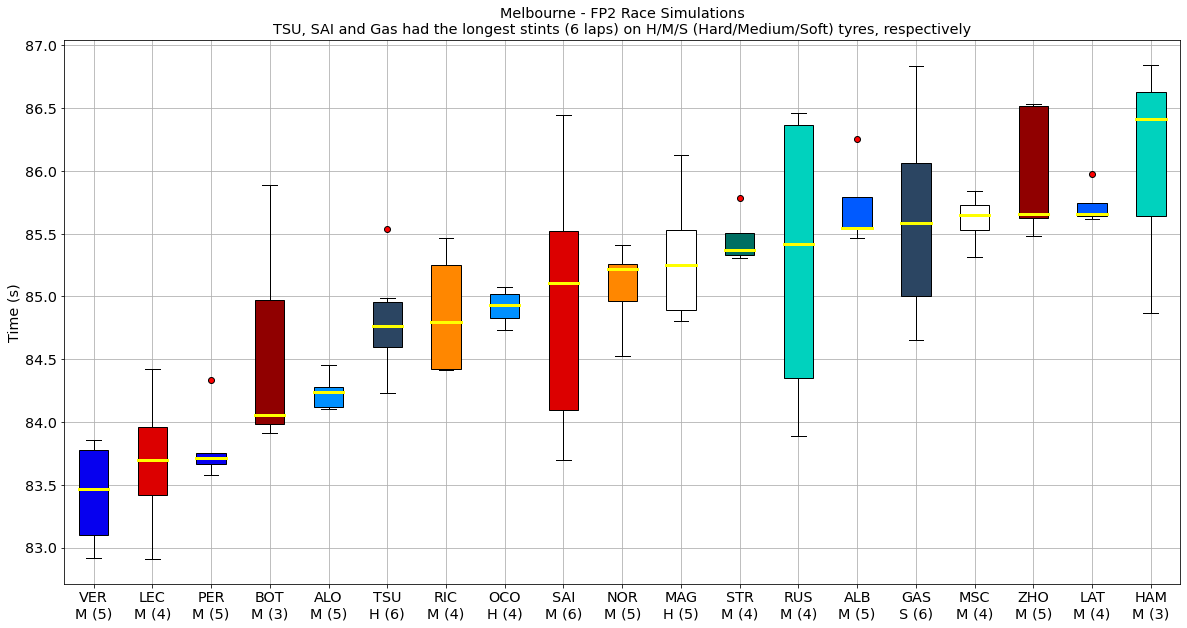

In [9]:
pltbox = plt.boxplot(sorted_times,
            patch_artist=True,
            labels=x_labels,
            flierprops=red_circle,
            medianprops=medianprops)

plt.ylabel("Time (s)")
plt.title("Melbourne - FP2 Race Simulations\nTSU, SAI and Gas had the longest stints (6 laps) on H/M/S (Hard/Medium/Soft) tyres, respectively")

for patch, color in zip(pltbox["boxes"], sorted_driver_colors):
    patch.set_facecolor(color)

plt.grid()
plt.savefig("./Australia_RaceSim.jpg")

plt.show()